# Klassifikation mit unstrukturierten Daten

## Unstrukturierte Daten

Wir beschäftigen und jetzt mit Textdaten. Dazu haben wir alle Toplevel-Posts des [Technology Subreddit](https://www.reddit.com/r/Technology) heruntergeladen und in einer CSV-Datei gespeichert:

 ### Feature Engineering

Bei unstrukturierten Daten musst du erst Features finden. Bei Bildern ist das z.B. sehr schwierig, deswegen wird dort fast immer nur Deep Learning verwendet. Dort macht der erste Layer aus den Pixel eine Art Features.

In [1]:
import pandas as pd
docs = pd.read_csv("reddit-technology-toplevel-title.csv.xz", parse_dates=["created_utc"])

Wie du siehst, sind das *viele* Posts, nämlich fast zwei Millionen:

In [2]:
docs

,title,created_utc,flair
0,Samsung vice chairman Jay Y. Lee faces nine-ye...,2020-12-31 16:36:16,Society
1,Asus TUF Gaming A15 Review,2020-12-31 09:51:03,Business
2,Google Maps' Moat is Evaporating,2020-12-31 02:52:38,Software
3,"A $15,000 Network Switch?? - HOLY $H!T",2020-12-30 18:12:41,NaN
4,25 inch E-INK monitor to reduce eyestrain,2020-12-30 09:51:50,NaN
...,...,...,...
1922036,Privacy concerns mount amid the 'microchipping...,2008-02-04 21:48:01,NaN
1922037,NEW 3d Display using holograms,2008-02-07 04:39:30,NaN
1922038,5 Heavy-Duty Supercomputer Science Projects fo...,2008-01-31 01:43:25,NaN
1922039,new Xfce desktop environment (Xfld 0.3),2008-01-28 08:13:29,NaN


Sind die Daten hinreichend aktuell? Solche Informationen überprüfst du besser gleich ganz zu Beginn:

<AxesSubplot:xlabel='created_utc'>

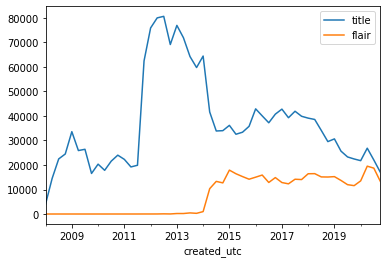

In [3]:
docs.set_index("created_utc").resample("Q").count().plot()

Das ist zwar nicht perfekt, aber es eignet sich doch hinreichend gut für eine Analyse.

Um die Daten zu vektorisieren, solltest du zuerst die Stopwords eliminieren. Das ist normalerweise ein iterativer Prozess, hier findest du die etwas ergänzte Stopword-Liste von `spacy` (damit du das nicht noch installieren musst):

In [4]:
stop_words= {"'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 
             'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 
             'amongst', 'amount', 'amp', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 
             'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 
             'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 
             'beyond', 'blog', 'body', 'both', 'bottom', 'but', 'buy', 'buycheap', 'by', 'ca', 'call', 'can', 'cannot', 
             'case', 'change', 'co', 'com', 'could', 'create', 'delete', 'did', 'do', 'does', 'doing', 'done', 'down', 
             'download', 'drive', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'email', 
             'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 
             'fifteen', 'fifty', 'first', 'five', 'fix', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 
             'full', 'further', 'get', 'give', 'go', 'good', 'had', 'has', 'have', 'he', 'help', 'hence', 'her', 'here', 
             'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 
             'http', 'https', 'hundred', 'i', 'if', 'in', 'indeed', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 
             'last', 'late', 'latter', 'latterly', 'least', 'less', 'll', 'look', 'made', 'make', 'many', 'market', 'may', 
             'me', 'meanwhile', 'message', 'might', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 
             'must', 'my', 'myself', "n't", 'name', 'namely', 'need', 'neither', 'never', 'nevertheless', 'new', 'news', 
             'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'number', 'n‘t', 
             'n’t', 'of', 'off', 'often', 'on', 'once', 'one', 'online', 'only', 'onto', 'or', 'other', 'others', 
             'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'page', 'part', 'pass', 'per', 'perhaps', 
             'please', 'post', 'put', 'question', 'quite', 'rather', 're', 'really', 'reddit', 'regarding', 'remove', 
             'review', 'same', 'say', 'search', 'see', 'seem', 'seemed', 'seeming', 'seems', 'self', 'send', 'serious', 
             'several', 'she', 'should', 'show', 'side', 'since', 'site', 'six', 'sixty', 'so', 'some', 'somehow', 
             'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'support', 'take', 'ten', 
             'test', 'text', 'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'third', 'this', 'those', 
             'though', 'three', 'through', 'throughout', 'thru', 'thus', 'time', 'to', 'together', 'too', 'top', 
             'toward', 'towards', 'twelve', 'twenty', 'two', 'under', 'unless', 'unlock', 'until', 'up', 'upon', 
             'us', 'use', 'used', 'using', 'various', 've', 'very', 'via', 'video', 'was', 'watch', 'way', 'we', 'well', 
             'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 
             'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'work', 'would', 'yet', 'you', 'your', 
             'yours', 'yourself', 'yourselves', '‘d', '‘ll', '‘m', '‘re', '‘s', '‘ve', '’d', '’ll', '’m', '’re', 
             '’s', '’ve'}

Für die Vektorisierung von Dokumente werden normalerweise die Wörter gezählt und als Features verwendet. Damit besonders häufige Wörter nicht zu stark dominieren, werden die mit der sog. "Inverierten Dokumentenfrequenz" abgewertet.

`scikit-learn` kann das mit dem `TfidfVectorizer` alles für dich erledigen

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=10, stop_words=stop_words)
tfidf_vectors = tfidf_vectorizer.fit_transform(docs["title"].map(str))
tfidf_vectors

<1922041x44978 sparse matrix of type '<class 'numpy.float64'>'
	with 11397513 stored elements in Compressed Sparse Row format>

Wie du siehst, ist die entstehende Matrix mit fast zwei Millionen Zeilen und knap 45.000 Spalten *sehr groß*. Da die meisten Wörter in den meisten Dokumenten nicht vorkommen, besteht sie zu einem ganz großen Teil aus leeren Einträgen und kann daher als sog. *sparse matrix* sehr effizient abgelegt werden:

In [6]:
tfidf_vectors.data.nbytes

91180104

Bei einer `float`-Darstellung mit vier Bytes pro `float` würde das in einer naiven Darstellung 1922041 x 44978 x 4 Bytes = 322 GB RAM benötigen. Zum Glück sind es hier nur 130 MB - ein Effizienzgewinn fast um den Faktor 3.000. Nur deswegen funktioniert das überhaupt!

### Reddit-Klassifikation

Betrachten wir unser echtes Datenset, gibt es auch hier Kategorien, nämlich die Flairs:

In [7]:
docs.groupby("flair").agg({"title": "count"}).sort_values("title", ascending=False).head(20)

,title
flair,
Business,64583
Discussion,36970
Software,32773
Hardware,32618
Security,29858
Politics,24801
Pure Tech,20911
Repost,14193
Transportation,12290


Passend zum Videokurs suchen wir uns den Flair *Artificial Intelligence* aus und setzen dessen *Target* auf 1:

In [8]:
docs["target"] = 0
docs.loc[docs["flair"] == "Artificial Intelligence", "target"] = 1

Nun sind allerdings die Dokumente ohne diesen Flair deutlich überrepräsentiert:

In [9]:
ai = docs[docs["flair"] == "Artificial Intelligence"]
len(ai)

10635

In [10]:
non_ai = docs[docs["flair"] != "Artificial Intelligence"]
len(non_ai)

1911406

Damit kann ein Modell nicht gut trainiert werden, weil viel zu viele negative Beispiele den Klassifikator in eine falsche Richtung drängen. Deswegen *stratifizieren* wir das Datenset und nehmen so viele negative wie positive Samples:

In [11]:
data = pd.concat([ai, non_ai.sample(n = len(ai), random_state=42)])
data

,title,created_utc,flair,target
41,Get access to world's largest collection of au...,2020-12-19 20:21:50,Artificial Intelligence,1
47,Microsoft and PepsiCo team up on the quest to ...,2020-12-17 21:05:13,Artificial Intelligence,1
78,(95) LinkedIn,2020-12-07 11:12:39,Artificial Intelligence,1
82,"A.I.-based CGI Pianist plays ""Symphonic Etudes...",2020-12-05 21:51:45,Artificial Intelligence,1
88,Online IT Certification From SPOTO,2020-12-01 06:51:19,Artificial Intelligence,1
...,...,...,...,...
920753,"Following new Huawei attack, China mulling mov...",2020-05-18 22:54:06,NaN,0
225975,Facebook Ads are a Scam,2019-01-11 23:37:20,Misleading,0
617628,Contaque’s Contact Center Solutions help impro...,2018-03-29 12:00:33,NaN,0
178707,dvd menu creator,2015-02-09 11:25:43,NaN,0


Du kannst weiter mit dem bereits trainierten Vectorizer arbeiten und rufst daher nur dessen `transform`-Methode auf:

In [12]:
ai_tfidf_vectors = tfidf_vectorizer.transform(data["title"].map(str))

Um die Ergebnisqualität messen zu können, teilst du das Datenset auf:

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ai_tfidf_vectors, data['target'], test_size = 0.25, random_state = 42)

Der Klassifikator ist schnell trainiert:

In [14]:
from sklearn.linear_model import SGDClassifier
ai_svm = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)
ai_svm.fit(X_train, y_train)

SGDClassifier(random_state=42)

Das Ergebnis ist schon ziemlich gut:

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ai_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      2654
           1       0.94      0.78      0.85      2664

    accuracy                           0.87      5318
   macro avg       0.88      0.87      0.87      5318
weighted avg       0.88      0.87      0.87      5318



Mit 87% Genauigkeit (hier passt die Accuracy wegen dem gleichverteilten Datenset) kannst du jetzt vorhersagen, ob ein Post von AI handelt oder nicht.